Logistic Regression
-----------

Import libraries

In [120]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from ml_models_results import reglog_model_results
from ml_models_results import resmpling_data
from ml_models_results import roc_curve_show
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.metrics import roc_curve, auc

Import datasets

In [76]:
data_train = pd.read_csv("data_output/data_train.csv",index_col=0)
data_val = pd.read_csv("data_output/data_val.csv",index_col=0)
data_test = pd.read_csv("data_output/data_test.csv",index_col=0)

Get target variable from each data

In [77]:
y_train = data_train['TARGET']
y_val = data_val['TARGET']
y_test = data_test['TARGET']

drop target variable from each dataset

In [78]:
data_train_model = data_train.drop(['TARGET'], axis=1)
data_val_model = data_val.drop(['TARGET'], axis=1)
data_test_model = data_test.drop(['TARGET'], axis=1)

####################################################################

Logistic Regression model with <strong> unbalanced classes </strong> :

####################################################################

In [79]:
model = LogisticRegression(random_state=0)
model1 = model.fit (data_train_model,y_train)

model results

In [80]:
results_model1 = reglog_model_results(model1,data_val_model,y_val,y_train)

<strong> Model Results </strong>

Class probabilities:

In [81]:
results_model1['Class_Probabilities']

array([[0.92795455, 0.07204545],
       [0.96791937, 0.03208063],
       [0.96261503, 0.03738497],
       ...,
       [0.89133098, 0.10866902],
       [0.94927435, 0.05072565],
       [0.94108336, 0.05891664]])

Predicted_Class_Labels :

In [82]:
print("Number of 1 predicted as output : ",results_model1['Predicted_Class_Labels'].sum())
length_y =  len(results_model1['Predicted_Class_Labels'])
print("Number of 0 predicted as output : ",length_y - results_model1['Predicted_Class_Labels'].sum())

Number of 1 predicted as output :  3
Number of 0 predicted as output :  61499


Real_Class_Labels :

In [83]:
print("Number of 1 real as output : ",sum(y_val))
length_y =  len(y_val)
print("Number of 0 predicted as output : ",length_y - sum(y_val))

Number of 1 real as output :  4998
Number of 0 predicted as output :  56504


<strong> Evaluate The Model </strong>

Confusion Matrix

In [84]:
results_model1['Confusion_Matrix']

array([[56501,     3],
       [ 4998,     0]])

Classification_Report :

In [85]:
print(results_model1['Classification_Report'])

             precision    recall  f1-score   support

          0       0.92      1.00      0.96     56504
          1       0.00      0.00      0.00      4998

avg / total       0.84      0.92      0.88     61502



Accuracy :

In [86]:
print("The accuracy of the model = ",results_model1['Accuracy'])

The accuracy of the model =  0.9186855712009365


ROC CURVE :

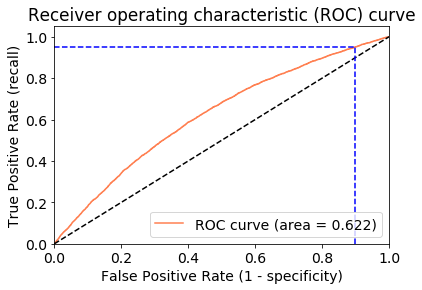

In [87]:
y_pred_proba = results_model1['Class_Probabilities'][:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

####################################################################

Logistic Regression model with <strong> balanced classes </strong> : <br/>
with the following formula : $ w_j = n / (k * n_j)$ <br/>
where $ w_j $  is the weight to class j, n is the number of observations, $ n_j $ is the number of observations in class j and k is the total number of classes.

####################################################################

In [88]:
model_balanced = LogisticRegression(random_state=0,class_weight='balanced')
model2 = model_balanced.fit (data_train_model,y_train)

model results

In [89]:
results_model2 = reglog_model_results(model2,data_val_model,y_val,y_train)

<strong> Model Results </strong>

Class probabilities:

In [90]:
results_model2['Class_Probabilities']

array([[0.50841764, 0.49158236],
       [0.59618473, 0.40381527],
       [0.62747798, 0.37252202],
       ...,
       [0.51219012, 0.48780988],
       [0.52971532, 0.47028468],
       [0.47054166, 0.52945834]])

Predicted_Class_Labels :

In [91]:
print("Number of 1 predicted as output : ",results_model2['Predicted_Class_Labels'].sum())
length_y =  len(results_model2['Predicted_Class_Labels'])
print("Number of 0 predicted as output : ",length_y - results_model2['Predicted_Class_Labels'].sum())

Number of 1 predicted as output :  25888
Number of 0 predicted as output :  35614


Real_Class_Labels :

In [92]:
print("Number of 1 real as output : ",sum(y_val))
length_y =  len(y_val)
print("Number of 0 predicted as output : ",length_y - sum(y_val))

Number of 1 real as output :  4998
Number of 0 predicted as output :  56504


<strong> Evaluate The Model </strong>

Confusion Matrix

In [93]:
results_model2['Confusion_Matrix']

array([[33541, 22963],
       [ 2073,  2925]])

Classification_Report :

In [94]:
print(results_model2['Classification_Report'])

             precision    recall  f1-score   support

          0       0.94      0.59      0.73     56504
          1       0.11      0.59      0.19      4998

avg / total       0.87      0.59      0.68     61502



Accuracy :

In [95]:
print("The accuracy of the model = ",results_model2['Accuracy'])

The accuracy of the model =  0.5929238073558584


ROC CURVE :

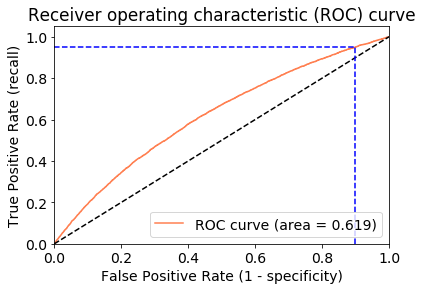

In [96]:
y_pred_proba = results_model2['Class_Probabilities'][:, 1]
[fpr, tpr, thr] = roc_curve(y_val, y_pred_proba)
idx = np.min(np.where(tpr > 0.95)) # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0,fpr[idx]], [tpr[idx],tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx],fpr[idx]], [0,tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

In [116]:
# get resampled data with perfect balanced classes (the same number of elements in each class)
percentage_to_sample = y_train.value_counts()[1]/y_train.value_counts()[0]*100
percentage_to_sample = int(round(percentage_to_sample))
data_resampled = resmpling_data(data_train,percentage_to_sample)

In [117]:
######### logistic regression model with resampled data  ##############
model3 = model.fit (data_resampled['predictors'],data_resampled['target'])

In [118]:
### model results
results_model3 = reglog_model_results(model3,data_val_model,y_val,y_train)

In [119]:
results_model3['AUC']

0.6166501465374483

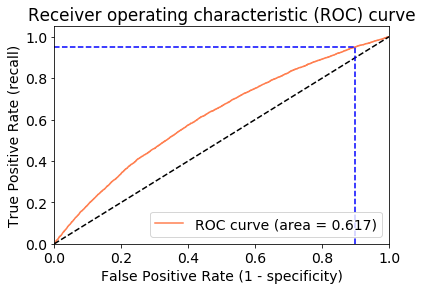

In [122]:
roc_curve_show(model3,data_val_model,y_val,y_train)